# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [262]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [263]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [264]:
#  1. Get the total rides for each city type
urban_df = pyber_data_df.loc[pyber_data_df["type"] == "Urban"]
rural_df = pyber_data_df.loc[pyber_data_df["type"] == "Rural"]
suburban_df = pyber_data_df.loc[pyber_data_df["type"] == "Suburban"]
total_rides = [len(rural_df), len(suburban_df), len(urban_df)]

In [265]:
# 2. Get the total drivers for each city type
urban_driver_count = city_data_df.loc[city_data_df["type"] == "Urban"].sum()["driver_count"]
rural_driver_count = city_data_df.loc[city_data_df["type"] == "Rural"].sum()["driver_count"]
suburban_driver_count = city_data_df.loc[city_data_df["type"] == "Suburban"].sum()["driver_count"]
total_drivers = [rural_driver_count, suburban_driver_count, urban_driver_count]

In [266]:
#  3. Get the total amount of fares for each city type
urban_fare = urban_df["fare"].sum()
rural_fare = rural_df["fare"].sum()
suburban_fare = suburban_df["fare"].sum()
total_fares = [rural_fare, suburban_fare, urban_fare]

In [267]:
#  4. Get the average fare per ride for each city type. 
urban_ride_ave = urban_fare/len(urban_df)
rural_ride_ave = rural_fare/len(rural_df)
suburban_ride_ave = suburban_fare/len(suburban_df)
average_fare_per_ride = [rural_ride_ave, suburban_ride_ave, urban_ride_ave]

In [268]:
# 5. Get the average fare per driver for each city type. 
urban_average = urban_fare/urban_driver_count
rural_average = rural_fare/rural_driver_count
suburban_average = suburban_fare/suburban_driver_count
average_fare_per_driver = [rural_average, suburban_average, urban_average]

In [269]:
#  6. Create a PyBer summary DataFrame. 
pyber = {"Total Rides" : total_rides,
        "Total Drivers" : total_drivers,
        "Total Fares" : total_fares,
        "Average Fare per Ride" : average_fare_per_ride,
        "Average Fare per Driver" : average_fare_per_driver}
pyber_summary_df = pd.DataFrame(pyber)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,125,78,4327.93,34.623440,55.486282
1,625,490,19356.33,30.970128,39.502714
2,1625,2405,39854.38,24.525772,16.571468


In [270]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [271]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,125,78,"$4,327.93",$34.62,$55.49
1,625,490,"$19,356.33",$30.97,$39.50
2,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [493]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [494]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_type_date = pyber_data_df.groupby(["type","date"]).sum()["fare"]
fare_by_type_date

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [443]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_by_type_date = fare_by_type_date.reset_index()

In [444]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
piv = fare_by_type_date.pivot(["date"],["type"],["fare"])

In [445]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_by_date_range_df = piv.reset_index().loc["date" == "2019-01-01":"2019-04-29"]
fare_by_date_range_df

date  fare                
type                      Rural Suburban  Urban
0     2019-01-01 00:08:16   NaN      NaN  37.91
1     2019-01-01 00:46:46   NaN    47.74    NaN
2     2019-01-01 02:07:24   NaN    24.07    NaN
3     2019-01-01 03:46:50   NaN      NaN   7.57
4     2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...   ...      ...    ...
2015  2019-04-19 12:57:51   NaN      NaN   4.55
2016  2019-04-19 14:47:58   NaN    44.82    NaN
2017  2019-04-19 16:30:12   NaN      NaN   6.27
2018  2019-04-19 17:18:53   NaN    29.27    NaN
2019  2019-04-19 19:05:10   NaN    29.12    NaN

[2020 rows x 4 columns]

In [446]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fare_by_date_range_df["date"] = pd.to_datetime(fare_by_date_range_df["date"])

In [447]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_by_date_range_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   (date, )          2020 non-null   datetime64[ns]
 1   (fare, Rural)     107 non-null    float64       
 2   (fare, Suburban)  519 non-null    float64       
 3   (fare, Urban)     1394 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 63.2 KB


In [448]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_by_week = fare_by_date_range_df.resample('W', on = "date").sum()
fare_by_week

fare                  
type         Rural Suburban    Urban
date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  195.60   768.91  1784.00

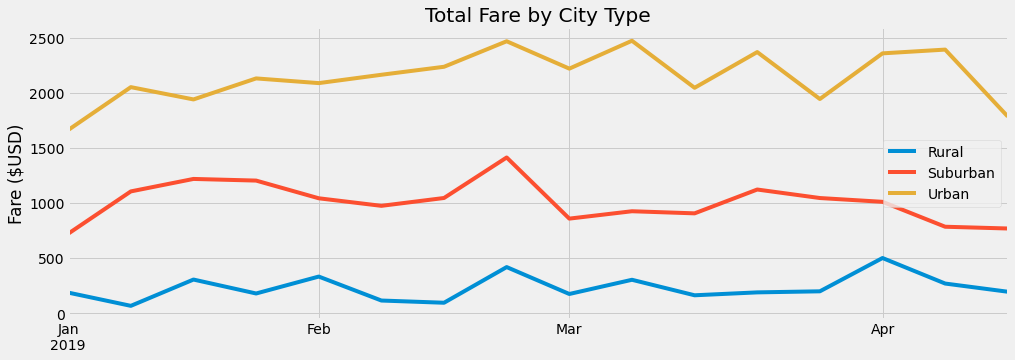

In [491]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
fare_by_week.plot(figsize =[15,5])

#format and plot graph
plt.ylabel("Fare ($USD)")
plt.xlabel("")
plt.title("Total Fare by City Type")
label = ["Rural","Suburban","Urban"]
plt.legend(label)

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#save to file
plt.savefig('analysis/PyBer_fare_summary.png',bbox_inches='tight')


